# Methods for Portfolio Optimization

In [3]:
!pip install tabulate

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 24.1.1
[notice] To update, run: python3.9 -m pip install --upgrade pip


In [4]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from scipy.optimize import minimize
from scipy.optimize import linprog
from tabulate import tabulate

### Function

In [5]:
# Function to calculate the return of a portfolio
def portfolio_return(weights, mean_returns):
    return np.dot(weights.T, mean_returns)

# Calculate the mean return of a portfolio given the asset weights and mean returns.
def checkMeanRet(weights, ret_mean):
    return np.dot(ret_mean.T, weights)

# Function to calculate the risk (variance) of a portfolio
def portfolio_risk(weights, cov_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Function to minimize risk given a target return  (Efficient frontier purpose)
def minimize_risk(weights, mean_returns, cov_matrix, target_return):
    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x, mean_returns) - target_return},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0, 1) for _ in range(len(mean_returns)))
    result = minimize(portfolio_risk, len(mean_returns) * [1. / len(mean_returns)], args=(cov_matrix,), 
                      method='SLSQP', bounds=bounds, constraints=constraints)
    return result

# Calculate the annual return from the weekly mean return.
def annualize_return(weekly_return):
    return (1 + weekly_return) ** 52 - 1

## Dataset
https://www.francescocesarone.com/data-sets


### Ftse100

FTSE100 FOLDER

The folder contains the weekly linear returns for the Ftse100 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Ftse100' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Ftse100' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [6]:
PORTFOLIO = 'Ftse100'

mat_file_1 = 'Ftse100/IndRet_Ftse100.mat'
mat_file_2 = 'Ftse100/RR_Ftse100.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftse100'].flatten()
matrix_ret = mat_data_1['Ret_ftse100']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 63


### Stoxx50

EUROSTOXX50 FOLDER

The folder contains the weekly linear returns for the Eurostoxx50 from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_Stoxx50' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_Stoxx50' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [7]:
PORTFOLIO = 'EuroStoxx50'

mat_file_1 = 'EuroStoxx50/IndRet_Stoxx50.mat'
mat_file_2 = 'EuroStoxx50/RR_Stoxx50.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_stoxx50'].flatten()
matrix_ret = mat_data_1['Ret_stoxx50']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 32


### FTSE Mib

The folder contains the weekly linear returns for the FtseMib from 01-22-2007 to 05-06-2013.
These returns are available into two extensions (.txt & .mat).

The files 'IndRet_FtseMib' contain a column vector which is the weekly linear returns of the market index values.

The files 'RR_FtseMib' contain a matrix where each column is the weekly linear returns of each asset.

NOTE: The returns are calculated from the weekly prices adjusted for dividends downloaded from yahoo.finance.com. 
Stocks with more than two consecutive missing values were disregarded, while the individual missing values were 
interpolated. 

In [8]:
PORTFOLIO = 'FSTE Mib'

mat_file_1 = 'FtseMib/IndRet_FtseMib.mat'
mat_file_2 = 'FtseMib/RR_FtseMib.mat'

mat_data_1 = scipy.io.loadmat(mat_file_1)
mat_data_2 = scipy.io.loadmat(mat_file_2)

array_ret = mat_data_1['Ret_ftsemib'].flatten()
matrix_ret = mat_data_1['Ret_ftsemib']
matrix_rr = mat_data_2['RR']

mean_returns = np.mean(matrix_rr, axis=0)
cov_matrix = np.cov(matrix_rr, rowvar=False)

nStocks = len(matrix_rr.T)
print(f"N. Stock: {nStocks}")

N. Stock: 34


## Analytics

Index Name: FSTE Mib
N. Stock: 34


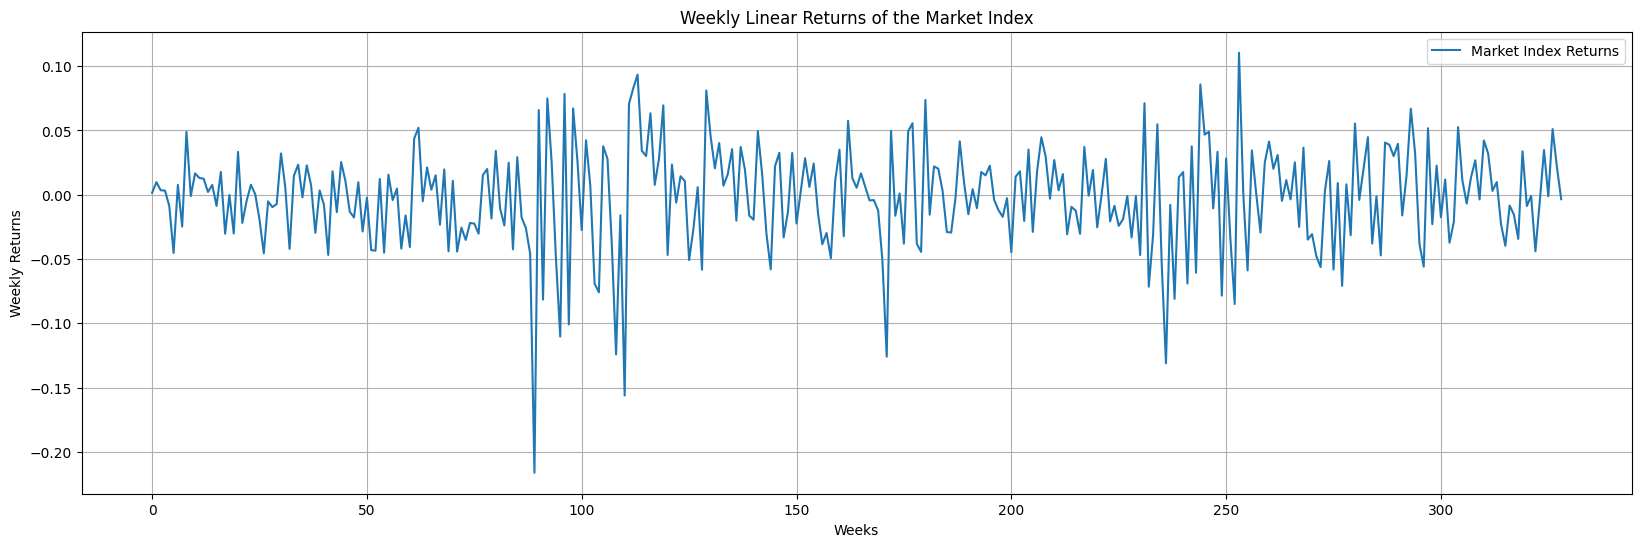

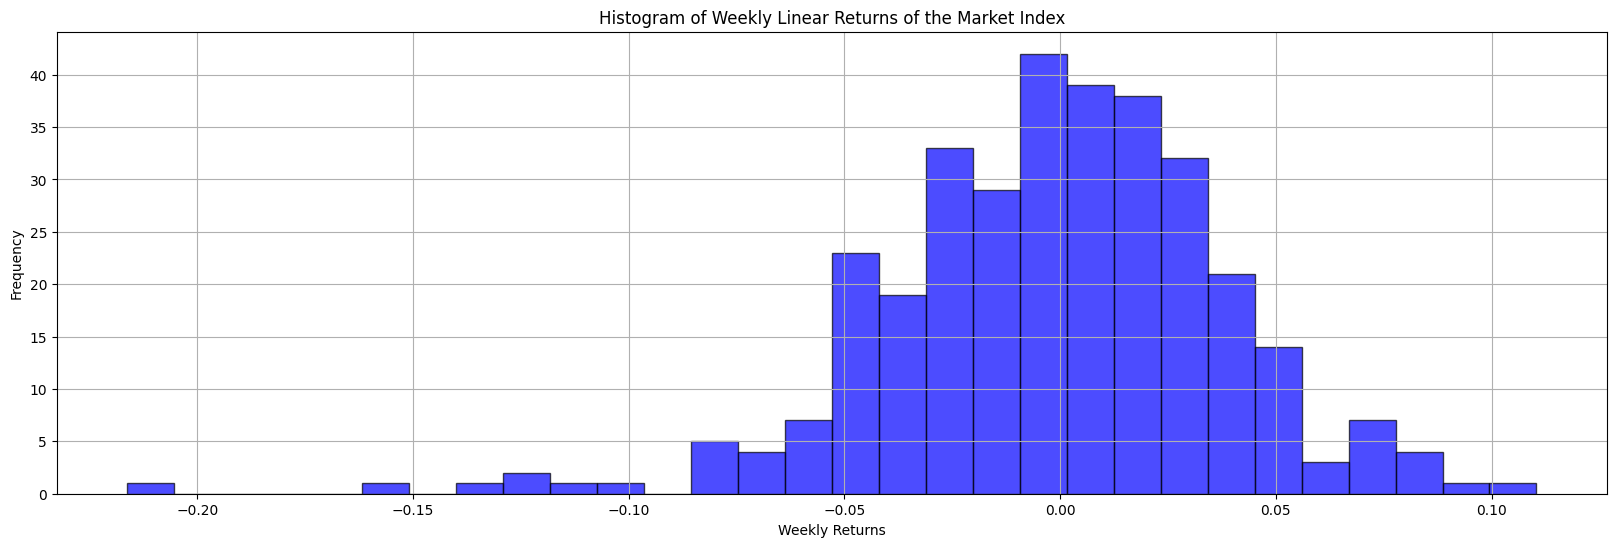

In [9]:
print(f"Index Name: {PORTFOLIO}")
print(f"N. Stock: {nStocks}")

plt.figure(figsize=(20, 6))
plt.plot(array_ret, label='Market Index Returns')
plt.xlabel('Weeks')
plt.ylabel('Weekly Returns')
plt.title('Weekly Linear Returns of the Market Index')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(20, 6))
plt.hist(array_ret, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Weekly Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Weekly Linear Returns of the Market Index')
plt.grid(True)
plt.show()

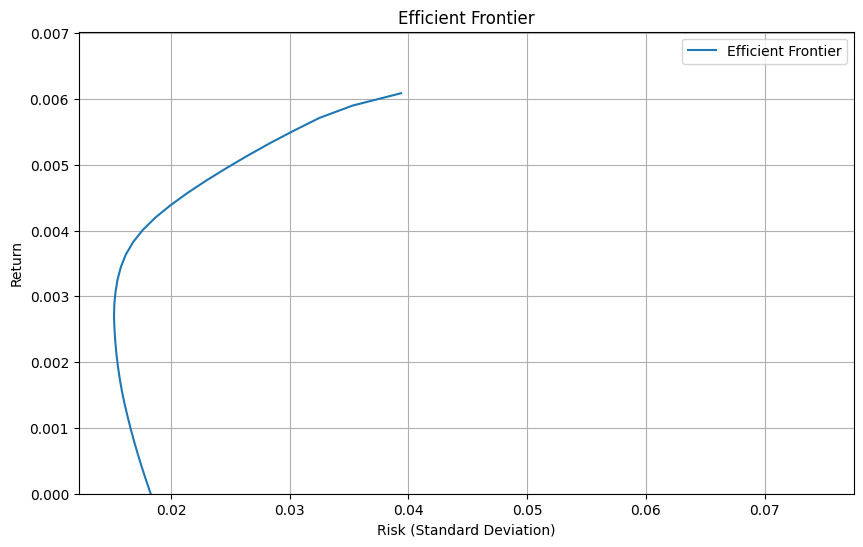

In [10]:
# Calculate the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Extract the risks and returns of the efficient portfolios
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Plotting Function
def plot_results(loss_values, returns_iteration, optimal_weights, label):
    plt.figure(figsize=(20, 5))

    # Loss Function Values
    plt.subplot(1, 2, 1)
    plt.plot(loss_values)
    plt.title('Objective Function Value')
    plt.xlabel('Iteration')
    plt.ylabel('Value')

    # Returns Values
    plt.subplot(1, 2, 2)
    plt.plot(returns_iteration, label=label)
    plt.title('Return over Iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Return Mean')
    plt.legend()

    ret_mean = checkMeanRet(optimal_weights, mean_returns) * 100
    risk = portfolio_risk(optimal_weights, cov_matrix)

    print('\n' + PORTFOLIO)
    print(f"Max Weights: {np.max(optimal_weights)}")
    print("Sum of weights:", np.sum(optimal_weights))
    print('Weekly Return Portfolio: ', np.round(ret_mean, 5), "%")
    print('Yearly Return Portfolio: ', annualize_return(ret_mean), "%")
    print("Risk: ", np.round(risk,3) * 100, "%")

    # Weights histogram
    plt.figure(figsize=(15, 5))
    plt.bar(range(len(optimal_weights)), optimal_weights, color='skyblue')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Histogram of weights')
    plt.xticks(range(len(optimal_weights)), labels=[f'Element {i+1}' for i in range(len(optimal_weights))])
    plt.grid(axis='y')

    plt.tight_layout()
    plt.show()

## Portfolio Optimizations

We have $n$ avaiable assets. We call $w_i$ the quantity of money invested on the
$i$-th asset during the considered period and with $r_i$ the returns on the $i$-th
asset. We have two different constraints. The first one is non-negativity for the
variables (i.e., $w_i$ ≥ 0). It basically means that short selling (selling asset that
we still don’t own) is not allowed. We then have the budget constraint:

$
\begin{equation}
\sum_{i=1}^{n} w_i = B
\end{equation}
$

the total amount of money invested needs to be equal to the budget $B$ ($B$ can be simply set to 1).
Consider a stochastic model for the returns: $r ∈ R^n$ is a randomly generated vector with mean $\overline{r}$ and covariance $\Sigma$. Thus expected return will be:
$
\begin{equation}
\overline{r}^\intercal \, w
\end{equation}
$
and variance (risk)
$
\begin{equation}
w^\intercal \, \Sigma \, w
\end{equation}
$
Classic portfolio problem, described by Markowitz (1952), is a convex quadratic programming problem:
$
\begin{equation}
\begin{split}
\underset{w∈R^n}{min} \quad \gamma \, w^\intercal \, \Sigma \, w - \overline{r}^\intercal \, w \\
s.t. \quad e^\intercal w = 1 \\
w > 0
\end{split}
\end{equation} 
$
with $\gamma$ > 0 risk-aversion parameter. Goal is thus finding the set of assets that
minimizes the variance (risk connected to the given portfolio) while maximizing
the expected return (we obviously need to satisfy budget and non-negativity
constraints).

In [12]:
def loss(weights, ret_mean, cov, RISK_AVERSION):
    return  np.dot(RISK_AVERSION, np.dot(weights.T, np.dot(cov, weights))) -  np.dot(ret_mean.T, weights)

### Gradient

$
\begin{equation}
\nabla f(w) = 2 \, \gamma \, \Sigma \, w - \overline{r}^\intercal\\
\end{equation} 
$

In [13]:
def gradient(weights, ret_mean, cov, RISK_AVERSION):
    return  RISK_AVERSION * 2 * np.dot(weights, cov) -  ret_mean.T

## Frank-Wolfe and Pairwise Frank-Wolfe over the Markowitz portfolio problems

In [14]:
RISK_AVERSION = 6

In [15]:
# Linear Minimization Oracle (LMO)
def linearMinimizationOracle(grad):
    s = np.zeros_like(grad)
    s[np.argmin(grad)] = 1  # Set the position with the smallest gradient to 1
    return s

# Perform a line search to find the optimal step size (gamma) that minimizes the loss function.
def line_search(weights, direction, ret_mean, cov_matrix, RISK_AVERSION):
    gamma_range = np.linspace(0, 1, 100)
    losses = [loss((1 - gamma) * weights + gamma * direction, ret_mean, cov_matrix, RISK_AVERSION) for gamma in gamma_range]
    optimal_gamma = gamma_range[np.argmin(losses)]
    return optimal_gamma

# Compute the duality gap for the given weights and gradient.
def duality_gap(weights, grad):
    s = linearMinimizationOracle(grad)
    return np.dot(grad, weights - s)

### Frank-Wolfe

00% - ret -0.03% - loss -0.000473 - duality gap 0.010043
05% - ret 00.32% - loss -0.001598 - duality gap 0.006908
10% - ret 00.41% - loss -0.001866 - duality gap 0.002689
15% - ret 00.43% - loss -0.002134 - duality gap 0.001727
20% - ret 00.39% - loss -0.002142 - duality gap 0.000405
25% - ret 00.39% - loss -0.002145 - duality gap 0.000231
30% - ret 00.40% - loss -0.002147 - duality gap 0.000123
35% - ret 00.39% - loss -0.002148 - duality gap 0.000107
40% - ret 00.40% - loss -0.002148 - duality gap 0.000088
45% - ret 00.40% - loss -0.002149 - duality gap 0.000055
50% - ret 00.40% - loss -0.002149 - duality gap 0.000047
55% - ret 00.40% - loss -0.002149 - duality gap 0.000047
60% - ret 00.40% - loss -0.002149 - duality gap 0.000047
65% - ret 00.40% - loss -0.002149 - duality gap 0.000047
70% - ret 00.40% - loss -0.002149 - duality gap 0.000047
75% - ret 00.40% - loss -0.002149 - duality gap 0.000047
80% - ret 00.40% - loss -0.002149 - duality gap 0.000047
85% - ret 00.40% - loss -0.0021

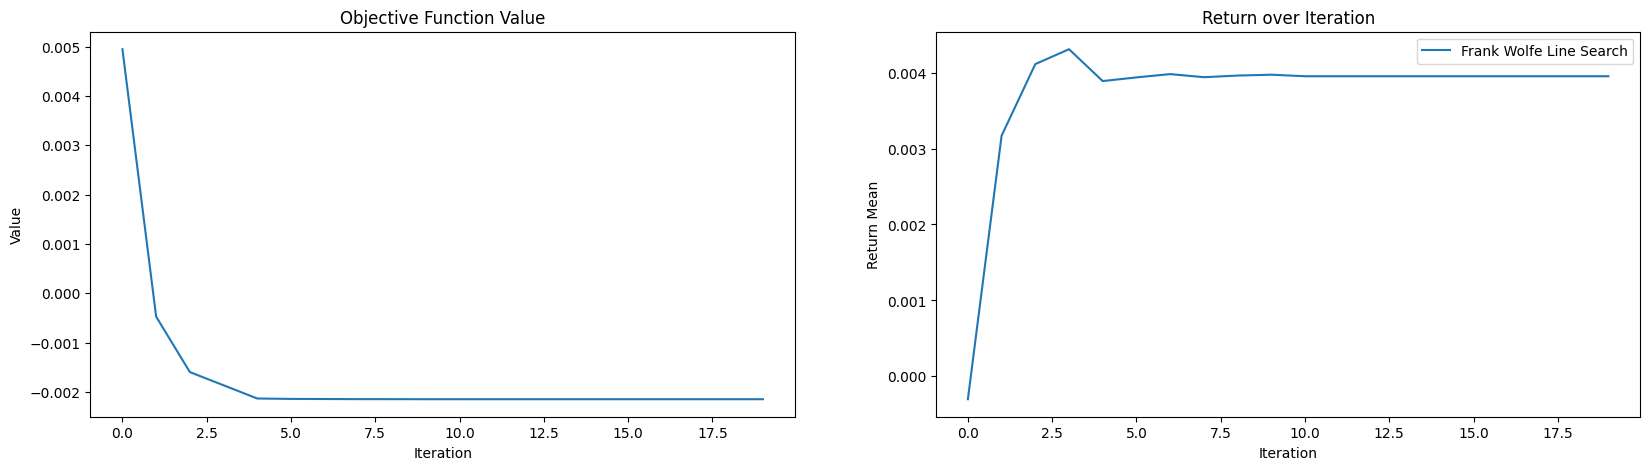

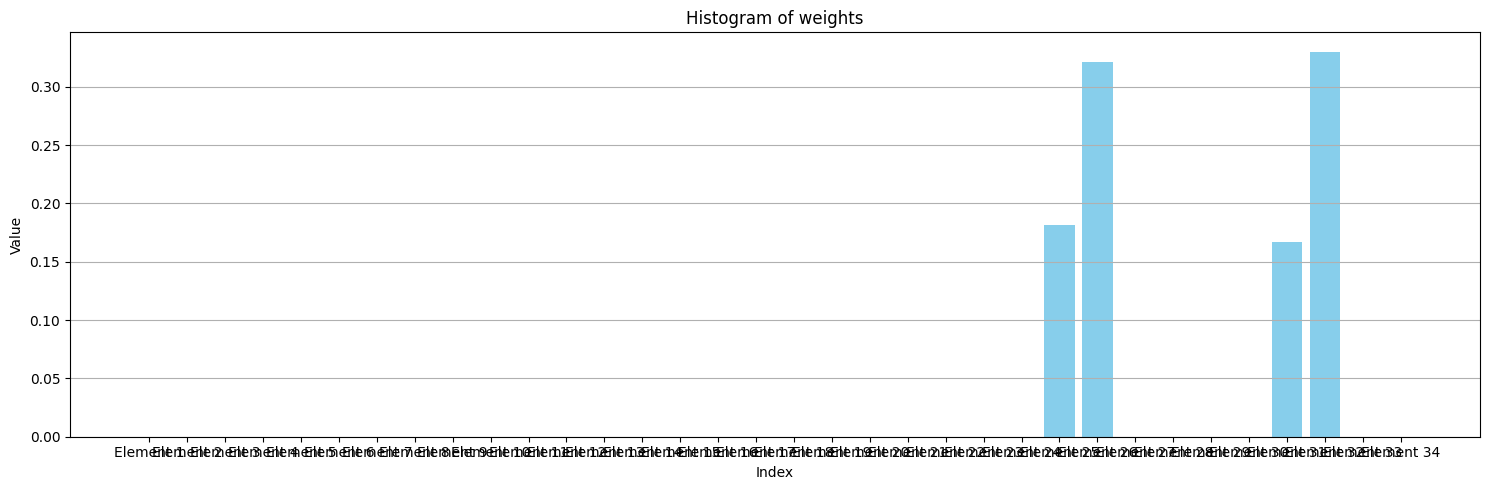

In [16]:
start_time = time.time()

ITERATIONS = 20

loss_values_ls = []
returns_iteration_ls = []
duality_gaps_ls = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    s = linearMinimizationOracle(grad)

    # Store values for plotting
    loss_values_ls.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_ls.append(checkMeanRet(weights, mean_returns))

    # Calculate duality gap
    gap = duality_gap(weights, grad)
    duality_gaps_ls.append(gap)
    
    gamma = line_search(weights, s, mean_returns, cov_matrix, RISK_AVERSION)
    weights = (1 - gamma) * weights + gamma * s
    
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)

    # Check for convergence with duality gap
    if np.linalg.norm(grad) < 1e-6 or gap < 1e-6:
        print(f"\nConverged at iteration {itr} with duality gap {gap:.6f}")
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_ls[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f} - duality gap {gap:.6f}")

optimal_weights_ls = weights

end_time = time.time()
wall_time_ls = round((end_time - start_time) * 1000)
print(f"Wall time: {wall_time_ls} ms")
plot_results(loss_values_ls, returns_iteration_ls, optimal_weights_ls, 'Frank Wolfe Line Search')

### PairWise Frank Wolfe

00% - ret -0.03% - loss 0.002125 - duality gap 0.010043
05% - ret 00.09% - loss 0.000849 - duality gap 0.005699
10% - ret 00.15% - loss 0.000145 - duality gap 0.004380
15% - ret 00.23% - loss -0.000278 - duality gap 0.003285
20% - ret 00.32% - loss -0.000910 - duality gap 0.003485
25% - ret 00.32% - loss -0.001268 - duality gap 0.002069
30% - ret 00.32% - loss -0.001300 - duality gap 0.001207
35% - ret 00.36% - loss -0.001536 - duality gap 0.001609
40% - ret 00.35% - loss -0.001544 - duality gap 0.001438
45% - ret 00.41% - loss -0.001799 - duality gap 0.001689
50% - ret 00.38% - loss -0.001877 - duality gap 0.000829
55% - ret 00.37% - loss -0.001827 - duality gap 0.000836
60% - ret 00.40% - loss -0.001952 - duality gap 0.001019
65% - ret 00.38% - loss -0.001845 - duality gap 0.000839
70% - ret 00.43% - loss -0.002016 - duality gap 0.001389
75% - ret 00.40% - loss -0.002052 - duality gap 0.000544
80% - ret 00.38% - loss -0.001979 - duality gap 0.000739
85% - ret 00.41% - loss -0.002040 

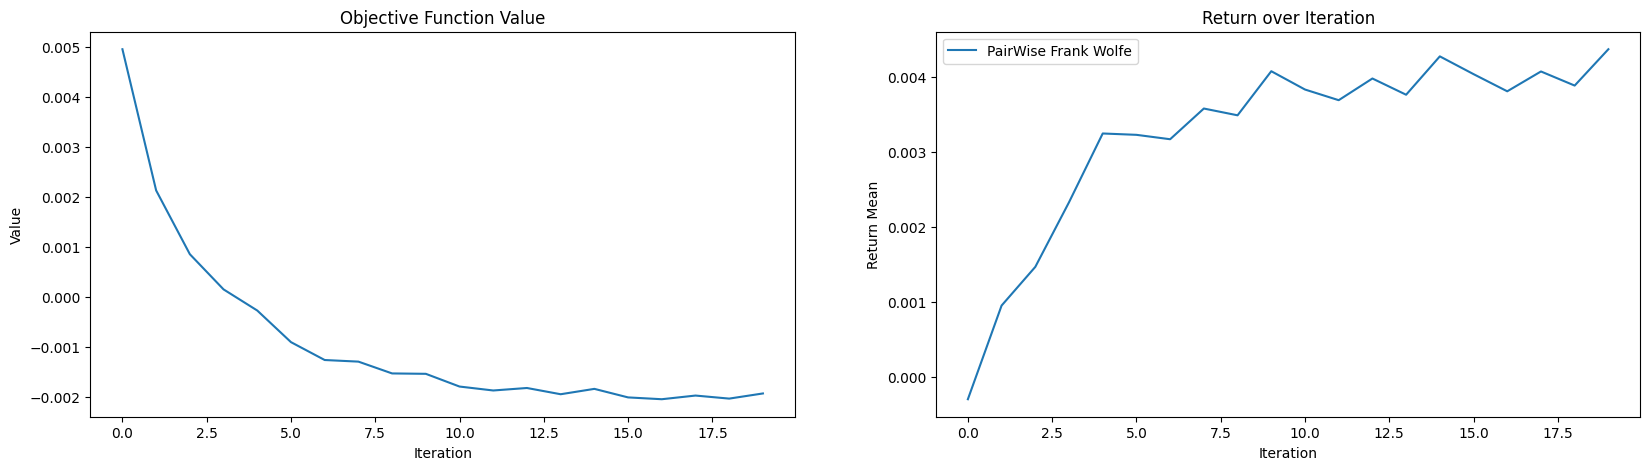

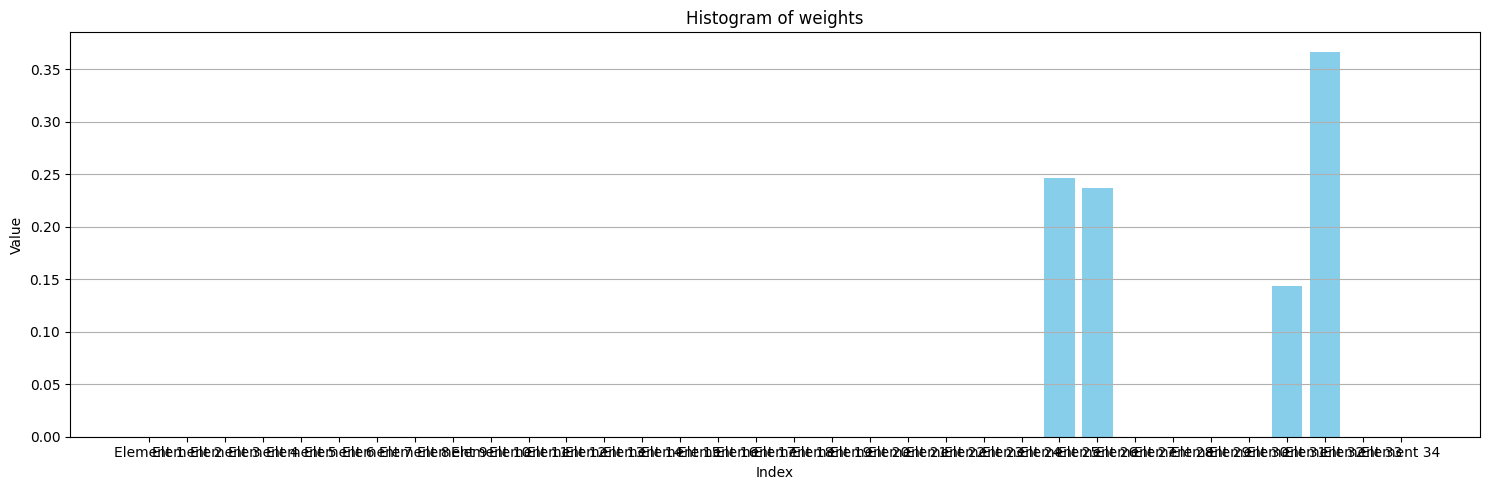

In [17]:
start_time = time.time()

ITERATIONS = 20

loss_values_pw = []
returns_iteration_pw = []
duality_gaps_pw = []

weights = np.ones(nStocks) / nStocks

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)
    
    i = np.argmin(grad)
    j = np.argmax(grad)

    # Store values for plotting
    loss_values_pw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_pw.append(checkMeanRet(weights, mean_returns))
    
    direction = np.zeros_like(weights)
    direction[i] = 1
    direction[j] = -1

    # Calculate duality gap
    gap = duality_gap(weights, grad)
    duality_gaps_pw.append(gap)

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)
    weights += gamma * direction

    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    # Check for convergence with duality gap
    if np.linalg.norm(grad) < 1e-6 or gap < 1e-6:
        print(f"\nConverged at iteration {itr} with duality gap {gap:.6f}")
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_pw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f} - duality gap {gap:.6f}")

optimal_weights_pw = weights

end_time = time.time()
wall_time_pw = round((end_time - start_time) * 1000)
print(f"Wall time: {wall_time_pw} ms")
plot_results(loss_values_pw, returns_iteration_pw, optimal_weights_pw, 'PairWise Frank Wolfe')

### Away Step Frank Wolfe

00% - ret -0.03% - loss 0.000516 - duality gap 0.010043
05% - ret 00.18% - loss -0.000310 - duality gap 0.005112
10% - ret 00.34% - loss -0.000336 - duality gap 0.003550
15% - ret 00.34% - loss -0.001142 - duality gap 0.003528
20% - ret 00.33% - loss -0.001397 - duality gap 0.002503
25% - ret 00.36% - loss -0.001567 - duality gap 0.001388
30% - ret 00.35% - loss -0.001662 - duality gap 0.000946
35% - ret 00.35% - loss -0.001683 - duality gap 0.000711
40% - ret 00.37% - loss -0.001732 - duality gap 0.000676
45% - ret 00.36% - loss -0.001766 - duality gap 0.000818
50% - ret 00.37% - loss -0.001818 - duality gap 0.000731
55% - ret 00.37% - loss -0.001834 - duality gap 0.000386
60% - ret 00.36% - loss -0.001844 - duality gap 0.000479
65% - ret 00.37% - loss -0.001864 - duality gap 0.000474
70% - ret 00.37% - loss -0.001871 - duality gap 0.000403
75% - ret 00.38% - loss -0.001884 - duality gap 0.000376
80% - ret 00.37% - loss -0.001892 - duality gap 0.000320
85% - ret 00.37% - loss -0.00189

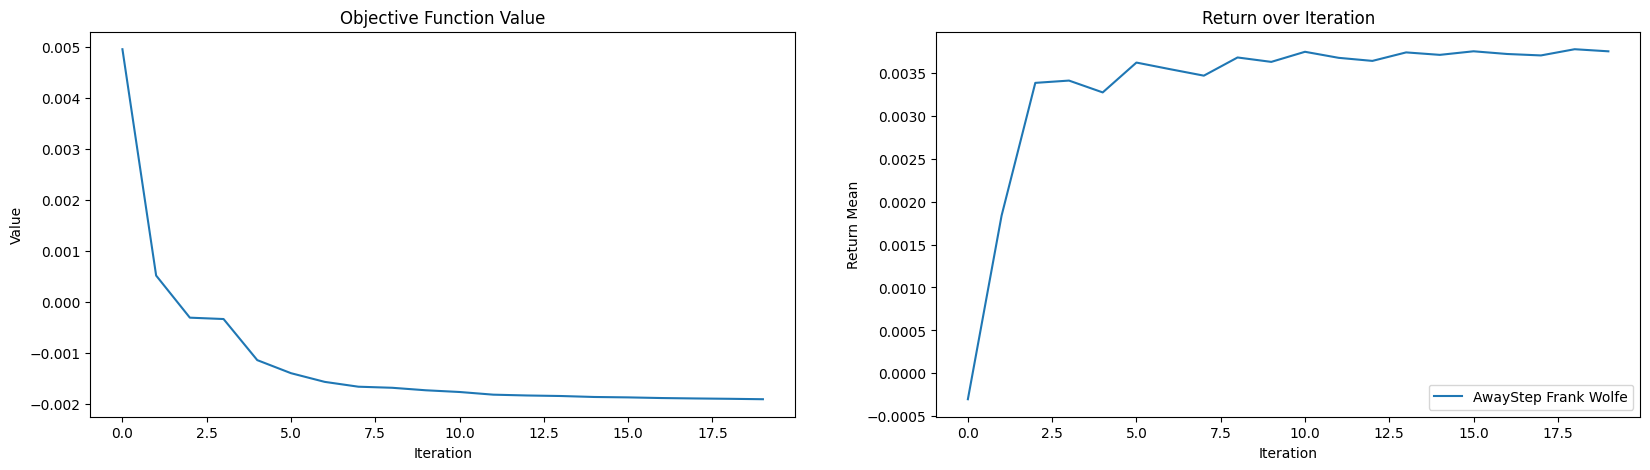

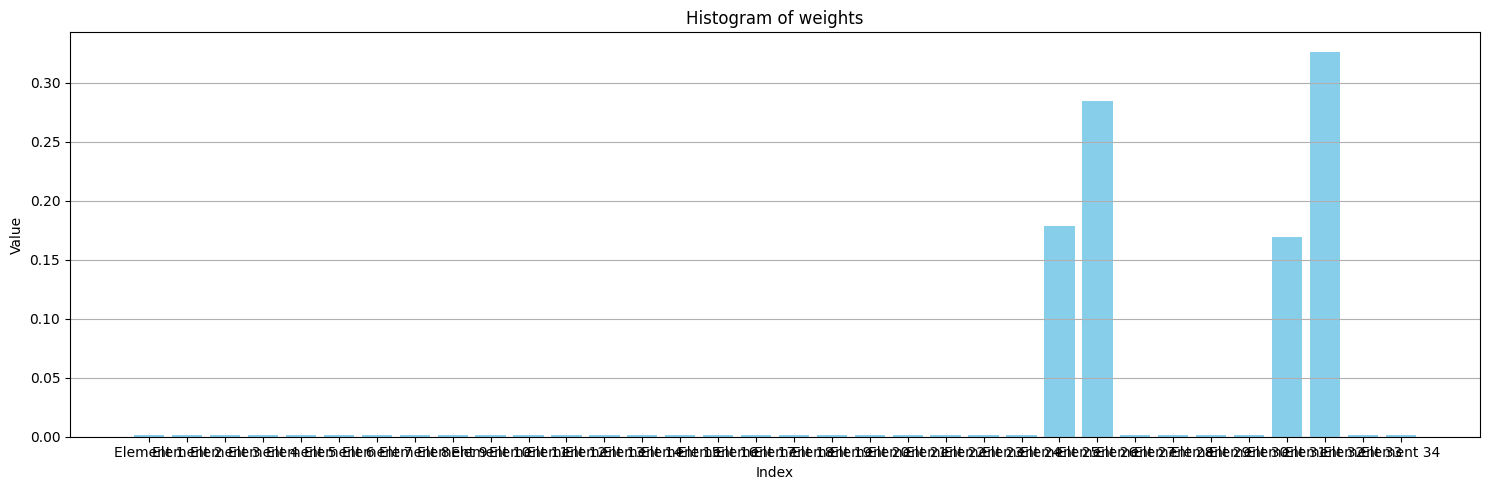

In [57]:
start_time = time.time()

ITERATIONS = 20

loss_values_aw = []
returns_iteration_aw = []
duality_gaps_aw = []

weights = np.ones(nStocks) / nStocks
V = [weights.copy()]

for itr in range(ITERATIONS):
    if itr % (ITERATIONS * 0.05) == 0:
        print(f"{int(itr/ITERATIONS*100):02}%", end="")

    grad = gradient(weights, mean_returns, cov_matrix, RISK_AVERSION)

    # Frank-Wolfe direction
    s = linearMinimizationOracle(grad)
    d_fw = s - weights
    
    # Away direction
    j = np.argmax(np.dot(np.array(V), grad))
    v_j = V[j]
    d_away = weights - v_j
    
    # Determine the optimal direction and step size
    if np.dot(grad, d_fw) <= np.dot(grad, d_away):
        direction = d_fw
        step_size = 1.0  # Frank-Wolfe step
    else:
        #direction = -d_away
        #max_step_size = np.min(weights[weights > 0] / (weights[weights > 0] - v_j[weights > 0]))
        #step_size = min(1.0, max_step_size)  # Away step
        direction = d_away
        alpha_vt = weights[j]
        max_step_size = alpha_vt / (1 - alpha_vt)
        step_size = min(1.0, max_step_size)

    # Store values for plotting
    loss_values_aw.append(loss(weights, mean_returns, cov_matrix, RISK_AVERSION))
    returns_iteration_aw.append(checkMeanRet(weights, mean_returns))

    # Calculate duality gap
    gap = duality_gap(weights, grad)
    duality_gaps_aw.append(gap)

    gamma = line_search(weights, direction, mean_returns, cov_matrix, RISK_AVERSION)
    gamma = min(gamma, step_size)

    weights += gamma * direction
    weights = np.clip(weights, 0, 1)
    weights /= np.sum(weights)
    
    # Add new vertex
    if np.array_equal(direction, d_fw):
        V.append(s.copy())
    else:
        if step_size == max_step_size and len(V) > 1:
            V.pop(j)  # Remove vertex

    # Check for convergence with duality gap
    if np.linalg.norm(grad) < 1e-6 or gap < 1e-6:
        print(f"\nConverged at iteration {itr} with duality gap {gap:.6f}")
        break

    if itr % (ITERATIONS * 0.05) == 0:
        print(f" - ret {(returns_iteration_aw[-1])*100:05.2f}% - loss {loss(weights, mean_returns, cov_matrix, RISK_AVERSION):05.6f} - duality gap {gap:.6f}")
            
optimal_weights_aw = weights

end_time = time.time()
wall_time_aw = round((end_time - start_time) * 1000)
print(f"Wall time: {wall_time_aw} ms")
plot_results(loss_values_aw, returns_iteration_aw, optimal_weights_aw, 'AwayStep Frank Wolfe')

## Results Comparison

### Loss Comparison

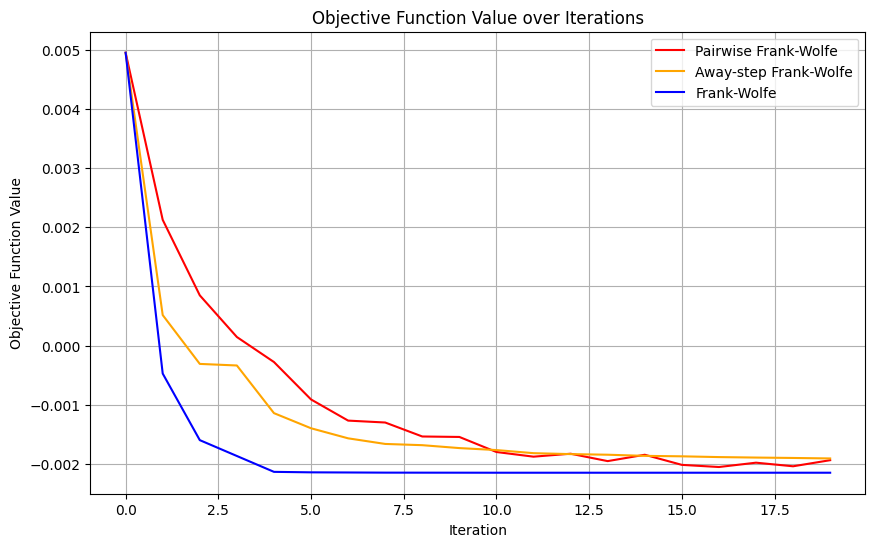

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(loss_values_pw, label='Pairwise Frank-Wolfe', color='red')
plt.plot(loss_values_aw, label='Away-step Frank-Wolfe', color='orange')
plt.plot(loss_values_ls, label='Frank-Wolfe', color='blue')

plt.title('Objective Function Value over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

### Duality Gap Comparison

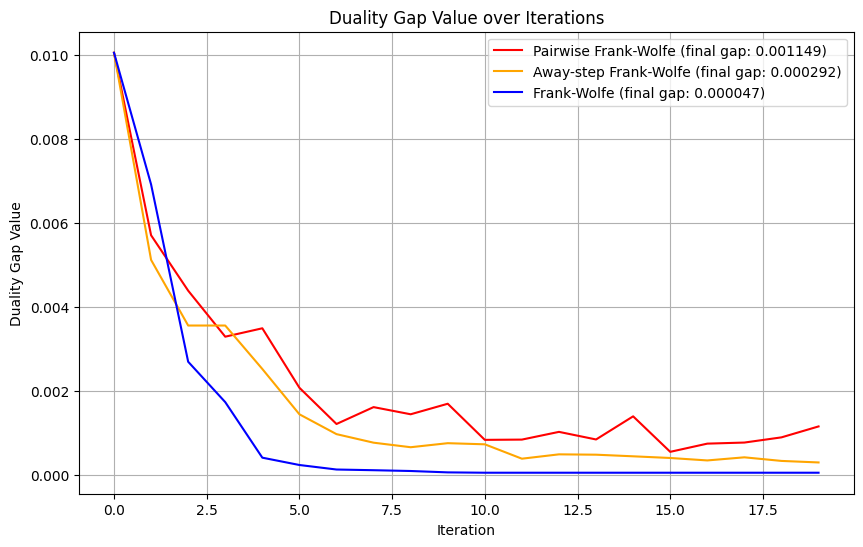

In [55]:
plt.figure(figsize=(10, 6))

# Plot duality gaps with labels including the final values
plt.plot(duality_gaps_pw, label=f'Pairwise Frank-Wolfe (final gap: {duality_gaps_pw[-1]:.6f})', color='red')
plt.plot(duality_gaps_aw, label=f'Away-step Frank-Wolfe (final gap: {duality_gaps_aw[-1]:.6f})', color='orange')
plt.plot(duality_gaps_ls, label=f'Frank-Wolfe (final gap: {duality_gaps_ls[-1]:.6f})', color='blue')

plt.title('Duality Gap Value over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Duality Gap Value')
plt.legend()
plt.grid(True)
plt.show()

### Efficent Frontier Comparison

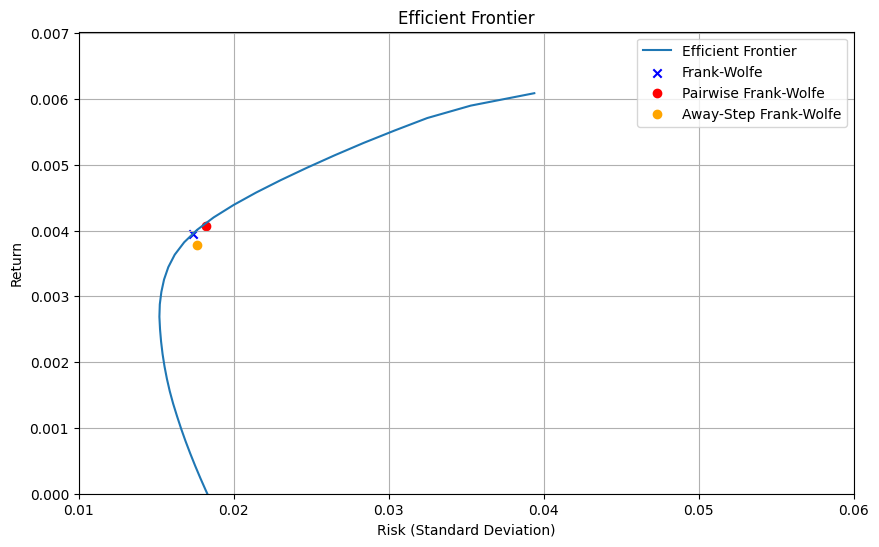

In [56]:
optimal_risk_linesearch = portfolio_risk(optimal_weights_ls, cov_matrix)
optimal_return_linesearch = portfolio_return(optimal_weights_ls, mean_returns)

optimal_risk_pw = portfolio_risk(optimal_weights_pw, cov_matrix)
optimal_return_pw = portfolio_return(optimal_weights_pw, mean_returns)

optimal_risk_aw = portfolio_risk(optimal_weights_aw, cov_matrix)
optimal_return_aw = portfolio_return(optimal_weights_aw, mean_returns)

# Generate the efficient frontier
target_returns = np.linspace(min(mean_returns), max(mean_returns), 100)
efficient_portfolios = []

for target_return in target_returns:
    efficient_portfolios.append(minimize_risk(len(mean_returns) * [1. / len(mean_returns)], mean_returns, cov_matrix, target_return))

# Extract the risks and returns of the efficient portfolios
risks = [portfolio_risk(x['x'], cov_matrix) for x in efficient_portfolios]
returns = [portfolio_return(x['x'], mean_returns) for x in efficient_portfolios]

plt.figure(figsize=(10, 6))
plt.plot(risks, returns, label='Efficient Frontier')
plt.scatter(optimal_risk_linesearch, optimal_return_linesearch, color='blue', label='Frank-Wolfe', marker='x')
plt.scatter(optimal_risk_pw, optimal_return_pw, color='red', label='Pairwise Frank-Wolfe', marker='o')
plt.scatter(optimal_risk_aw, optimal_return_aw, color='orange', label='Away-Step Frank-Wolfe', marker='o')

plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.ylim(0) 
plt.xlim(0.01,0.06) 
plt.legend()
plt.grid(True)
plt.show()

### Risk and Return Comparison

In [39]:
annual_return_linesearch = annualize_return(optimal_return_linesearch)
annual_return_pw = annualize_return(optimal_return_pw)
annual_return_aw = annualize_return(optimal_return_aw)

data = {
    'Method': ['Frank-Wolfe', 'Pairwise Frank-Wolfe', 'Away-step Frank-Wolfe'],
    'Optimal Risk (%)': [round(optimal_risk_linesearch * 100, 2), round(optimal_risk_pw * 100, 2), round(optimal_risk_aw * 100, 2)],
    'Weekly Return (%)': [round(optimal_return_linesearch * 100, 2), round(optimal_return_pw * 100, 2), round(optimal_return_aw * 100, 2)],
    'Annual Return (%)': [round(annual_return_linesearch * 100, 2), round(annual_return_pw * 100, 2), round(annual_return_aw * 100, 2)]
}

results_df = pd.DataFrame(data)
print(tabulate(results_df, headers='keys', tablefmt='pretty'))

+---+-----------------------+------------------+-------------------+-------------------+
|   |        Method         | Optimal Risk (%) | Weekly Return (%) | Annual Return (%) |
+---+-----------------------+------------------+-------------------+-------------------+
| 0 |      Frank-Wolfe      |       1.73       |        0.4        |       22.77       |
| 1 | Pairwise Frank-Wolfe  |       1.82       |       0.41        |       23.52       |
| 2 | Away-step Frank-Wolfe |       1.76       |       0.38        |       21.66       |
+---+-----------------------+------------------+-------------------+-------------------+


### Time Comparison

In [40]:
data_time = {
    'Method': ['Frank-Wolfe', 'Pairwise Frank-Wolfe', 'Away-step Frank-Wolfe'],
    'Execution Time (ms)': [wall_time_ls, wall_time_pw, wall_time_aw]
}

results_time_df = pd.DataFrame(data_time)
print(tabulate(results_time_df, headers='keys', tablefmt='pretty'))

+---+-----------------------+---------------------+
|   |        Method         | Execution Time (ms) |
+---+-----------------------+---------------------+
| 0 |      Frank-Wolfe      |         41          |
| 1 | Pairwise Frank-Wolfe  |         38          |
| 2 | Away-step Frank-Wolfe |         69          |
+---+-----------------------+---------------------+


### Investment Simulation

Index: FSTE Mib
Risk Aversion: 6


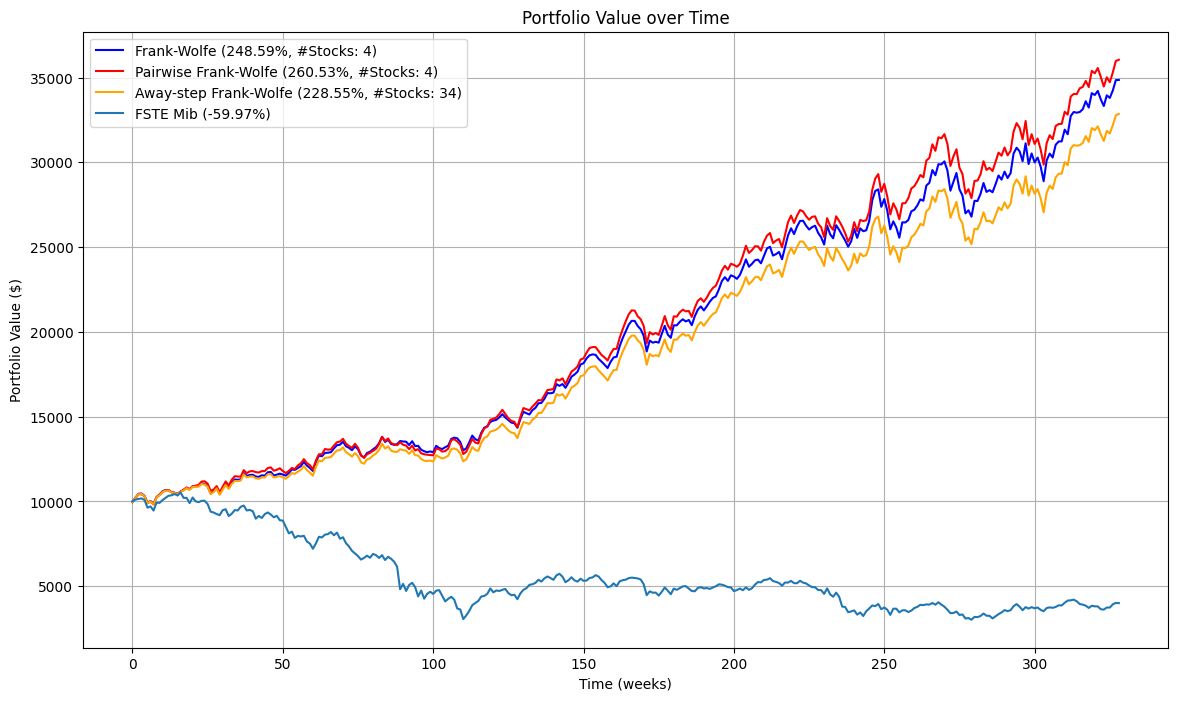

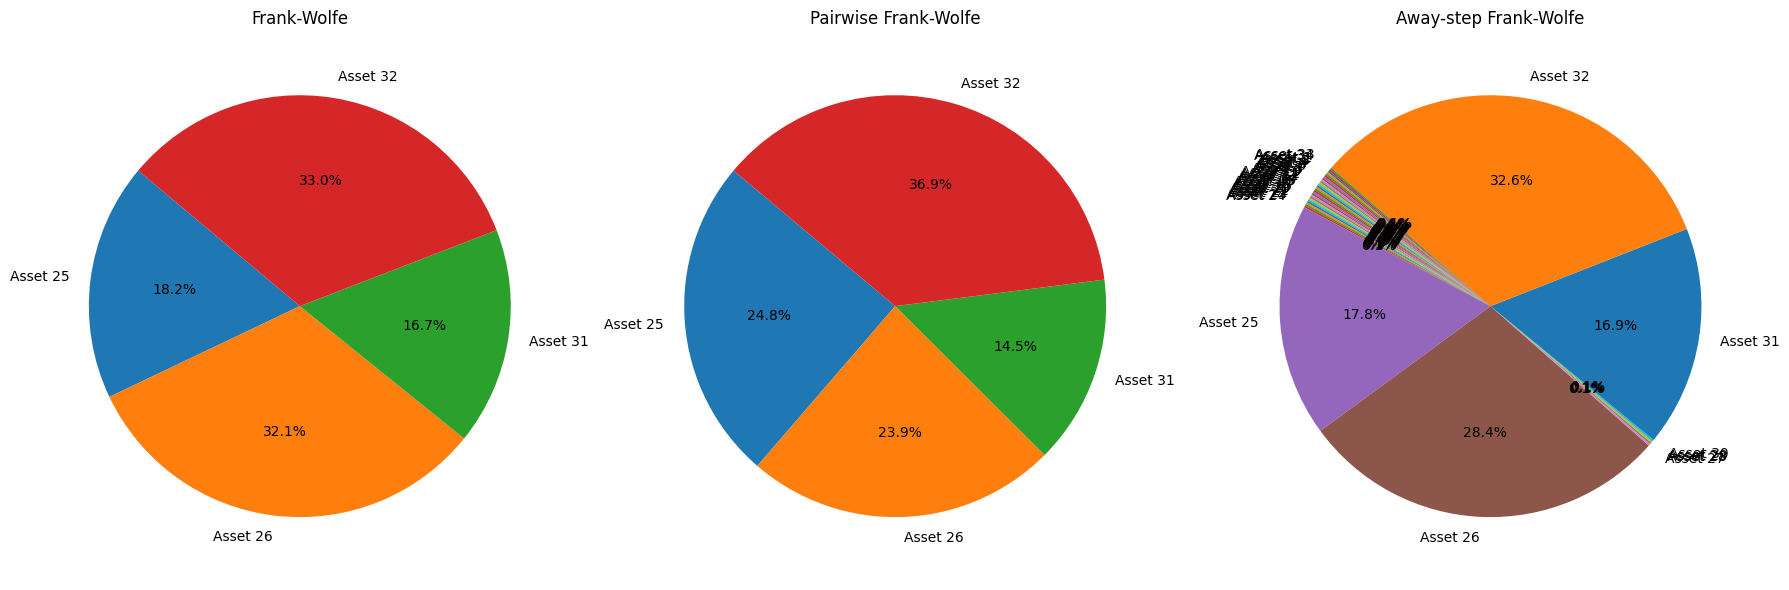

In [41]:
print(f"Index: {PORTFOLIO}")
print(f"Risk Aversion: {RISK_AVERSION}")

initial_investment = 10000

# Function to create a pie chart
def plot_pie_chart(weights, title, ax):
    positive_weights = num_positive_weights(weights)
    labels = [f'Asset {i+1}' for i in range(len(weights)) if weights[i] > 0.0009]
    ax.pie(positive_weights, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title)
    ax.set_facecolor('white')  # Set the background color to white

# Calculate the portfolio value over time
def portfolio_value(weights, matrix_ret, initial_investment):
    cumulative_returns = np.cumprod(1 + np.dot(matrix_ret, weights))
    return initial_investment * cumulative_returns

def calculate_investment_value(array_ret, initial_investment):
    
    factors = 1 + np.array(array_ret)
    cumulative_returns = np.cumprod(factors)
    investment_value = initial_investment * cumulative_returns
    
    return investment_value

# Weights > 0.0009
def num_positive_weights(weights):
    return weights[weights > 0.0009]

# Calculate the portfolio values for each method
portfolio_values_pw = portfolio_value(optimal_weights_pw, matrix_rr, initial_investment)
portfolio_values_aw = portfolio_value(optimal_weights_aw, matrix_rr, initial_investment)
portfolio_values_ls = portfolio_value(optimal_weights_ls, matrix_rr, initial_investment)
portfolio_values_index = calculate_investment_value(array_ret, initial_investment)

# Calculate the final percentage returns
final_return_pw = (portfolio_values_pw[-1] / initial_investment - 1) * 100
final_return_aw = (portfolio_values_aw[-1] / initial_investment - 1) * 100
final_return_ls = (portfolio_values_ls[-1] / initial_investment - 1) * 100
final_return_index = (portfolio_values_index[-1] / initial_investment - 1) * 100

# Calculate the number of weights greater than zero for each method
num_positive_pw = num_positive_weights(optimal_weights_pw)
num_positive_aw = num_positive_weights(optimal_weights_aw)
num_positive_ls = num_positive_weights(optimal_weights_ls)

plt.figure(figsize=(14, 8))
plt.plot(portfolio_values_ls, label=f'Frank-Wolfe ({final_return_ls:.2f}%, #Stocks: {len(num_positive_ls)})', color='blue')
plt.plot(portfolio_values_pw, label=f'Pairwise Frank-Wolfe ({final_return_pw:.2f}%, #Stocks: {len(num_positive_pw)})', color='red')
plt.plot(portfolio_values_aw, label=f'Away-step Frank-Wolfe ({final_return_aw:.2f}%, #Stocks: {len(num_positive_aw)})', color='orange')
plt.plot(portfolio_values_index, label=f'{PORTFOLIO} ({final_return_index:.2f}%)')
plt.xlabel('Time (weeks)')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value over Time')
plt.legend()
plt.grid(True)
plt.show()

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), facecolor='white')

# Plot each pie chart in a subplot
plot_pie_chart(optimal_weights_ls, 'Frank-Wolfe', axes[0])
plot_pie_chart(optimal_weights_pw, 'Pairwise Frank-Wolfe', axes[1])
plot_pie_chart(optimal_weights_aw, 'Away-step Frank-Wolfe', axes[2])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
final_gap_ls = duality_gaps_ls[-1]
final_gap_aw = duality_gaps_aw[-1]
final_gap_pw = duality_gaps_pw[-1]

data = {
    'Method': ['Frank-Wolfe', 'Pairwise Frank-Wolfe', 'Away-step Frank-Wolfe'],
    'Optimal Risk (%)': [optimal_risk_linesearch * 100, optimal_risk_pw * 100, optimal_risk_aw * 100],
    'Weekly Return (%)': [optimal_return_linesearch * 100, optimal_return_pw * 100, optimal_return_aw * 100],
    'Execution Time (ms)': [wall_time_ls, wall_time_pw, wall_time_aw],
    'Final Duality Gap': [final_gap_ls, final_gap_pw, final_gap_aw]
}

results_df = pd.DataFrame(data)

print(tabulate(results_df, headers='keys', tablefmt='pretty'))

# Evaluation of methods
# Lower risk is better, higher return is better, lower execution time is better, lower duality gap is better
results_df['Risk Score'] = 1 / results_df['Optimal Risk (%)']
results_df['Return Score'] = results_df['Weekly Return (%)']
results_df['Time Score'] = 1 / results_df['Execution Time (ms)']
results_df['Gap Score'] = 1 / (results_df['Final Duality Gap'] * 100)

# Total Score
results_df['Total Score'] = results_df[['Risk Score', 'Return Score', 'Time Score', 'Gap Score']].sum(axis=1)

# Sort the methods based on the total score
results_df = results_df.sort_values(by='Total Score', ascending=False)

print("\nFinal Ranking:")
print(tabulate(results_df[['Method', 'Total Score']], headers='keys', tablefmt='pretty'))

+---+-----------------------+--------------------+---------------------+---------------------+-----------------------+
|   |        Method         |  Optimal Risk (%)  |  Weekly Return (%)  | Execution Time (ms) |   Final Duality Gap   |
+---+-----------------------+--------------------+---------------------+---------------------+-----------------------+
| 0 |      Frank-Wolfe      | 1.7338547383809146 | 0.3952344461608641  |         41          | 4.706399766340501e-05 |
| 1 | Pairwise Frank-Wolfe  | 1.8222124920329172 | 0.4070698796304174  |         38          | 0.0011488054099684417 |
| 2 | Away-step Frank-Wolfe | 1.6772383728762386 | 0.38159586665449075 |         130         | 0.0004921137896515423 |
+---+-----------------------+--------------------+---------------------+---------------------+-----------------------+

Final Ranking:
+---+-----------------------+--------------------+
|   |        Method         |    Total Score     |
+---+-----------------------+--------------------